Q1

In [47]:
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

pd.options.display.float_format = '{:.8f}'.format

warnings.filterwarnings("ignore")

x = sp.symbols('x')

# fa = x+e**x**2cosx
f_a = x + sp.exp(-x**2)*sp.cos(x)
f_b = (x + sp.exp(-x**2)*sp.cos(x))**2

d_f_a = sp.diff(f_a, x)
d_f_b = sp.diff(f_b, x)

d2_f_a = sp.diff(d_f_a, x)
d2_f_b = sp.diff(d_f_b, x)

f_a = sp.lambdify(x, f_a)
f_b = sp.lambdify(x, f_b)

d_f_a = sp.lambdify(x, d_f_a)
d_f_b = sp.lambdify(x, d_f_b)

d2_f_a = sp.lambdify(x, d2_f_a)
d2_f_b = sp.lambdify(x, d2_f_b)

def modified_newtons_method(f:callable, df:callable, d2f:callable, p0: np.float64, tol : np.float64 =1e-6 , max_iter: int = 1000) ->tuple:
    p = p0
    p_values = [p]
    error = []
    i = 1
    while i < max_iter:
        p = p - f(p)*df(p)/(df(p)**2 - f(p)*d2f(p))
        p_values.append(p)
        rel_err = abs((p_values[i] - p_values[i-1])/p_values[i])
        error.append(rel_err)
        if rel_err < tol:
            break
        i+=1

    return i,p_values,error

def newton_raphson(f:callable, df:callable,  p0: np.float64, tol : np.float64 =1e-6 , max_iter: int = 1000) ->tuple:
    p = p0
    p_values = [p]
    error = []
    i = 1
    while i < max_iter:
        p = p - f(p)/df(p)
        p_values.append(p)
        rel_err = abs((p_values[i] - p_values[i-1])/p_values[i])
        error.append(rel_err)
        if rel_err < tol:
            break
        i+=1

    return i,p_values,error

def secant(f:callable, p0: np.float64, p1: np.float64, tol : np.float64 =1e-6 , max_iter: int = 1000) ->tuple:
    p_values = [p0,p1]
    i = 1
    error = []
    while i < max_iter: 
        p = p1 - f(p1)*(p1-p0)/(f(p1)-f(p0))
        p_values.append(p)
        rel_err = abs((p_values[i] - p_values[i-1])/p_values[i])
        error.append(rel_err)
        if rel_err < tol:
            break
        p0 = p1
        p1 = p
        i+=1
    return i,p_values, error

iterations_newton_f_a, p_values_newton_f_a, error_values_newton_a = newton_raphson(f_a, d_f_a, 0)
iterations_newton_f_b, p_values_newton_f_b, error_values_newton_b = newton_raphson(f_b, d_f_b, 0)
iterations_secant_f_a, p_values_secant_f_a, error_values_secant_a = secant(f_a, 0, 1)
iterations_secant_f_b, p_values_secant_f_b, error_values_secant_b= secant(f_b, 0, 1)
iterations_modified_newton_f_a, p_values_modified_newton_f_a, error_values_MN_a = modified_newtons_method(f_a, d_f_a, d2_f_a, 0)
iterations_modified_newton_f_b, p_values_modified_newton_f_b, error_values_MN_b = modified_newtons_method(f_b, d_f_b, d2_f_b, 0)
max_length = max(
    len(p_values_newton_f_a),
    len(p_values_newton_f_b),
    len(p_values_secant_f_a),
    len(p_values_secant_f_b),
    len(p_values_modified_newton_f_a),
    len(p_values_modified_newton_f_b)
    )

p_values_newton_f_a.extend([np.nan] * (max_length - len(p_values_newton_f_a)))
p_values_newton_f_b.extend([np.nan] * (max_length - len(p_values_newton_f_b)))
p_values_secant_f_a.extend([np.nan] * (max_length - len(p_values_secant_f_a)))
p_values_secant_f_b.extend([np.nan] * (max_length - len(p_values_secant_f_b)))
p_values_modified_newton_f_a.extend([np.nan] * (max_length - len(p_values_modified_newton_f_a)))
p_values_modified_newton_f_b.extend([np.nan] * (max_length - len(p_values_modified_newton_f_b)))

data = {
    'Newton a)': p_values_newton_f_a,
    'Secant a)': p_values_secant_f_a,
    'Newton b)': p_values_newton_f_b,
    'Secant b)': p_values_secant_f_b,
    'Modified Newton a)': p_values_modified_newton_f_a,
    'Modified Newton b)': p_values_modified_newton_f_b
}

table = pd.DataFrame(data)
iterations = pd.DataFrame(data =
        {
            'Newton' : [iterations_newton_f_a, iterations_newton_f_b],
            'Secant' : [iterations_secant_f_a, iterations_secant_f_b],
            'Modified Newton' : [iterations_modified_newton_f_a, iterations_modified_newton_f_b]
        }
        ,
        index=['a', 'b']
    )

iterations


,Newton,Secant,Modified Newton
a,5,8,5
b,19,35,5


In [41]:
table

,Newton a),Secant a),Newton b),Secant b),Modified Newton a),Modified Newton b)
0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,-1.00000000,1.00000000,-0.50000000,1.00000000,-0.25000000,-0.25000000
2,-0.53064402,-5.03103873,-0.54459804,-2.28811910,-0.50630518,-0.50630518
3,-0.58862653,-0.16051867,-0.56655001,2.23874342,-0.58716732,-0.58716732
4,-0.58840178,-0.82983062,-0.57748280,89.85757285,-0.58840176,-0.58840176
5,-0.58840178,-0.57563757,-0.58294333,2.18452285,-0.58840178,-0.58840178
6,NaN,-0.58871034,-0.58567273,2.13290670,NaN,NaN
7,NaN,-0.58840173,-0.58703729,1.09750165,NaN,NaN
8,NaN,-0.58840178,-0.58771954,0.57216311,NaN,NaN
9,NaN,-0.58840178,-0.58806066,-4.82599571,NaN,NaN


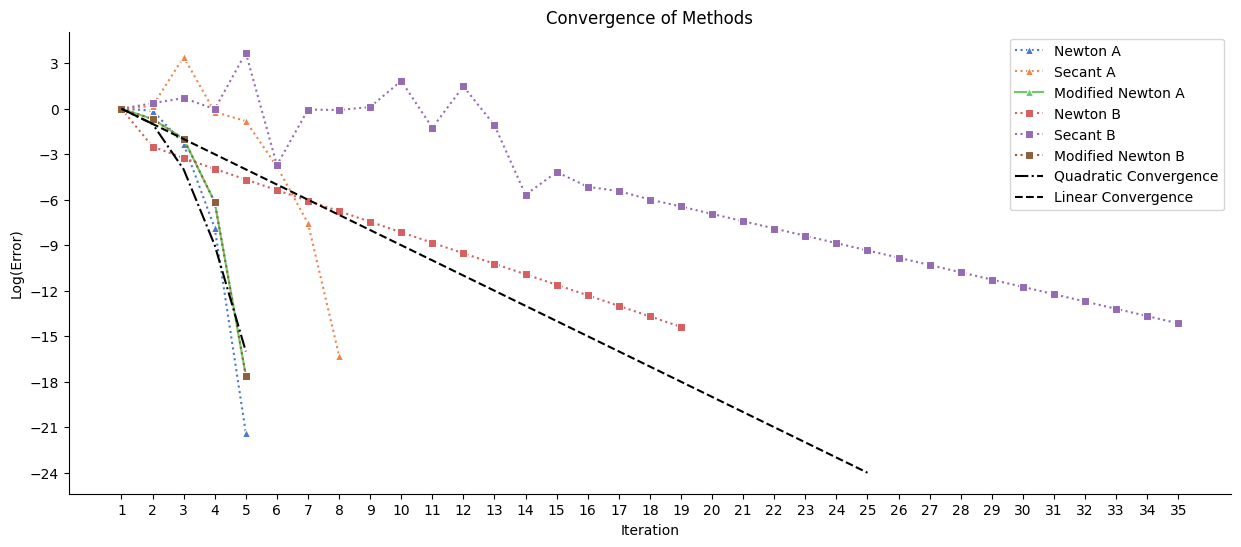

In [64]:
plt.figure(figsize=(15, 6))

# Define a harmonious color palette
colors = sns.color_palette("muted", 6)

# Plot with triangles for A plots and squares for B plots, and dotted lines
sns.lineplot(y=np.log(error_values_newton_a), x = range(1, len(error_values_newton_a)+1), color=colors[0], marker='^', linestyle=':', label='Newton A')
sns.lineplot(y=np.log(error_values_secant_a), x = range(1, len(error_values_secant_a)+1), color=colors[1], marker='^', linestyle=':', label='Secant A')
sns.lineplot(y=np.log(error_values_MN_a), x = range(1, len(error_values_MN_a)+1), color=colors[2], marker='^', linestyle='-', label='Modified Newton A')
sns.lineplot(y=np.log(error_values_newton_b), x = range(1, len(error_values_newton_b)+1), color=colors[3], marker='s', linestyle=':', label='Newton B')
sns.lineplot(y=np.log(error_values_secant_b),x = range(1, len(error_values_secant_b)+1), color=colors[4], marker='s', linestyle=':', label='Secant B')
sns.lineplot(y=np.log(error_values_MN_b),x = range(1, len(error_values_MN_b)+1), color=colors[5], marker='s', linestyle=':', label='Modified Newton B')

max_length = len(error_values_secant_b)
iterations = np.arange(25)
linear_convergence = -iterations  # Linear convergence line
iterations = np.arange(5)
quadratic_convergence = -iterations**2  # Quadratic convergence line

plt.plot(range(1,6) ,quadratic_convergence, 'k-.', label='Quadratic Convergence')
plt.plot(range(1,26), linear_convergence, 'k--', label='Linear Convergence')
plt.xlabel('Iteration')
plt.ylabel('Log(Error)')
plt.title('Convergence of Methods')
plt.yticks(np.arange(-24, 6, 3))
plt.xticks(np.arange(1, 36, 1))
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.show()

Q3

In [44]:
theta2, theta3 = sp.symbols('theta2 theta3')

r1, r2, r3, r4 = 10, 6, 8, 4
theta4 = np.deg2rad(220)

f1 = r2 * sp.cos(theta2) + r3 * sp.cos(theta3) + r4 * sp.cos(theta4) - r1
f2 = r2 * sp.sin(theta2) + r3 * sp.sin(theta3) + r4 * sp.sin(theta4)

F = sp.Matrix([f1, f2])

J = F.jacobian([theta2, theta3])


# This is a workaround to convert the SymPy expressions to NumPy functions taken with the help of copilot.
F_func = sp.lambdify((theta2, theta3), F, 'numpy')
J_func = sp.lambdify((theta2, theta3), J, 'numpy')
# end of workaround

theta_values = []

def newton_raphson_system(F_func, J_func, theta0, tol=1e-4, max_iter=1000):
    theta = theta0
    theta_values.append([np.rad2deg(theta[0]), np.rad2deg(theta[1])])
    for i in range(1, max_iter + 1):
        F_val = np.array(F_func(theta[0], theta[1]), dtype=np.float64).flatten()
        J_val = np.array(J_func(theta[0], theta[1]), dtype=np.float64)

        delta_theta = np.linalg.solve(J_val, -F_val)
        theta = theta + delta_theta
        theta_values.append([np.rad2deg(theta[0]), np.rad2deg(theta[1])])
        if np.linalg.norm(delta_theta, ord=2) / np.linalg.norm(theta, ord=2)  < tol:
            return i, theta

    return max_iter, theta

theta_initial = np.array([np.deg2rad(30), np.deg2rad(0)], dtype=np.float64)

iterations, theta = newton_raphson_system(F_func, J_func, theta_initial)

# Convert the solution back to degrees
theta2_sol, theta3_sol = np.rad2deg(theta)

print(f"Solution: theta2 = {theta2_sol} degrees, theta3 = {theta3_sol} degrees")
print(f"Number of iterations: {iterations}")

Solution: theta2 = 32.01518035932675 degrees, theta3 = -4.370987405000886 degrees
Number of iterations: 4


In [45]:
theta_values = pd.DataFrame(theta_values, columns=['theta2', 'theta3'], index=range(iterations + 1))
theta_values 

,theta2,theta3
0,30.00000000,0.00000000
1,32.52053015,-4.70854110
2,32.02031123,-4.37506065
3,32.01518100,-4.37098789
4,32.01518036,-4.37098741


In [46]:
error_values_MN_a

[np.float64(1.0),
 np.float64(0.506226658737182),
 np.float64(0.137715675789965),
 np.float64(0.0020979527318468172),
 np.float64(2.2875331050982027e-08)]

----